# Objective
Hello! This is my first notebook on Kaggle as I have just started with machine learning. This notebook does not cover advanced ML, but I will be practicing new ML concepts that I have learned (step-by-step).

In this project I will predict the BMI of a person using multiple variables.

Below is the default cell that comes with this notebook. It imports `numpy` and `pandas`, two libraries that are essential for data science. It also imports other input files to set up our coding environment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv


# Step 1: Load & Review the Data
Let's begin by loading and examining the dataset.

In [2]:
body_data = pd.read_csv('/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv')
body_data.head()   # prints first 5 rows of DataFrame

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
print(body_data.shape)    # prints the number of (rows, cols)
print(body_data.columns)  # prints list of columns

(500, 4)
Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')


As we can see, the DataFrame contains 500 rows with 4 columns (thats alot of data!)

# Step 2: Prepare the Data

### Data Cleaning 
Before we can begin building our model it is important to make sure the data is properly analyzed and cleaned (to avoid future issues). Let's check to make sure we do not have **missing values**.
* `isnull().any()` will return True if there is any missing data within each column.

In [4]:
body_data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

### Handling Text
Luckily, there is no missing data (yay!). Lets now handle any string values to make training our ML algorithm simpler. Let's take a look at the `Gender` column.

In [5]:
print(body_data.Gender.describe())
print(body_data.Gender.unique())

count        500
unique         2
top       Female
freq         255
Name: Gender, dtype: object
['Male' 'Female']


We can see that there are only two string values, `Male` and `Female`. These can be easily converted to integers.
* `1` will represent `Male`
* `2` will represent `Female`

We can convert these values by using a simple dictionary and the pandas `replace` method.

In [6]:
body_data.Gender = body_data.Gender.replace({'Male': 1})
body_data.Gender = body_data.Gender.replace({'Female': 2})
body_data.Gender

0      1
1      1
2      2
3      2
4      1
      ..
495    2
496    2
497    2
498    1
499    1
Name: Gender, Length: 500, dtype: int64

The cleaned up data now looks like this:

In [7]:
body_data.head(10)

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,2,185,110,4
3,2,195,104,3
4,1,149,61,3
5,1,189,104,3
6,1,147,92,5
7,1,154,111,5
8,1,174,90,3
9,2,169,103,4


# Step 3: Select & Train Your Model
Now that the data is prepared, let's identify our **target variable** (what we want to predict) and our **feature variables** (the data used to create predictions).
* Target(y): The `Index` column, since this is what we will be predicting.
* Features(X): The 'Gender', 'Height, and 'Weight' columns. The data within these columns will be used to **fit** and **train** our model.

Since all other columns will be used as feature variables, lets put them together...

In [8]:
# features are ['Gender', 'Height', 'Weight']
X = body_data.drop('Index', axis=1) # Keeps all columns except Index
X.head()

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,2,185,110
3,2,195,104
4,1,149,61


...The `Index` column will be our solution, so it will be stored in its own variable.

In [9]:
y = body_data.Index

Now onto deciding our **ML model**. Since we are predicting the `Index`, lets first look at the values `Index` has.

In [10]:
y

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

Let's identify the model we intend on training using the information we know:
* The data we have **includes the desired solution** (`Index`), making this a **supervised learning** system.
* The predictions we want are **specific numeric values**, making this a **regression problem**.
* There are **multiple feature variables** we are dealing with, so we should use a **Multiple Linear Regression Model**.

Lets now fit and train a Linear Regression model. Thanks to our prior data preparation, training a model becomes very simple:

In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X,y)

LinearRegression()

Quick and easy. Now that our model is trained, we can create predictions using this model on our feature variables. Since the data is so large, lets display the first 10 predictions made by our model:

In [12]:
predictions = reg.predict(X)  # Stored in a numpy array
predictions[:10]

array([3.28841387, 2.46115665, 3.33836883, 2.78686402, 2.98369094,
       3.03354154, 4.09734893, 4.49243258, 3.08639567, 3.66185952])

# Step 4: Evaluate Your Model
Now that we have our working Linear Regression model, Lets evaluate and visualize the prediction values compared to the actual values. We can **evaluate the accuracy** of a training model using Scikit-Learn's `mean_squared_error` function.

In [13]:
print("Predicted Mean", predictions.mean())
print("Actual Mean", y.mean())
print('\n')
print("Predicted Standard Deviation", predictions.std())
print("Actual Standard Deviation", y.std())
print('\n')
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
print("Prediction Error", lin_rmse)

Predicted Mean 3.748
Actual Mean 3.748


Predicted Standard Deviation 1.230370900555847
Actual Standard Deviation 1.3550528907291186


Prediction Error 0.5645205461853389


Lastly, lets visualize the data between our training model and actual `Index` values.

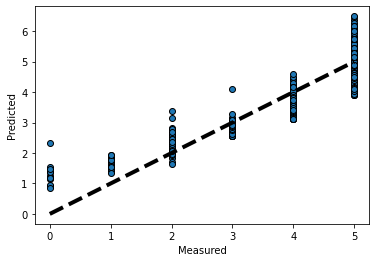

In [14]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y, predictions, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()